# Model based clustering :  French Presidential election 2022 / 1st round (regional scale)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import plotly.express as px


# 1. Data 

In [8]:
data = pd.read_excel('data/resultats-par-niveau-reg-t1-france-entiere.xlsx')
columns = data.columns
columns

Index(['Code de la région', 'Libellé de la région', 'Etat saisie', 'Inscrits',
       'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs',
       '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot',
       'Exprimés', '% Exp/Ins', '% Exp/Vot', 'Sexe', 'Nom', 'Prénom', 'Voix',
       '% Voix/Ins', '% Voix/Exp', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed:

In [9]:
#Renomme les colonnes associées aux résultats par candidat
old_names = ['Sexe', 'Nom', 'Prénom', 'Voix',
       '% Voix/Ins', '% Voix/Exp', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',
       'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85',
       'Unnamed: 86', 'Unnamed: 87', 'Unnamed: 88']
candidats = ['arthaud', 'roussel', 'macron', 'lassalle', 'lepen', 'zemmour', 'melenchon', 'hidalgo', 'jadot', 'pecresse', 'poutou', 'dupont_aignant']
labels = ['Sexe', 'Nom', 'Prénom', 'Voix', '%Voix/Ins', '%Voix/Exp']
new_names = [l + '_' + c for c in candidats for l in labels]
dict_rename = {old_names[i]: new_names[i] for i in range(len(new_names))}
data.rename(columns = dict_rename, inplace=True)
columns = data.columns
data

,Code de la région,Libellé de la région,Etat saisie,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,...,Prénom_poutou,Voix_poutou,%Voix/Ins_poutou,%Voix/Exp_poutou,Sexe_dupont_aignant,Nom_dupont_aignant,Prénom_dupont_aignant,Voix_dupont_aignant,%Voix/Ins_dupont_aignant,%Voix/Exp_dupont_aignant
0,44,Grand Est,Complet,3862920,1008344,26.10,2854576,73.90,42255,1.09,...,Philippe,22241,0.58,0.80,M,DUPONT-AIGNAN,Nicolas,74916,1.94,2.68
1,75,Nouvelle-Aquitaine,Complet,4463041,962499,21.57,3500542,78.43,53440,1.20,...,Philippe,32597,0.73,0.95,M,DUPONT-AIGNAN,Nicolas,67645,1.52,1.98
2,84,Auvergne-Rhône-Alpes,Complet,5557535,1228490,22.10,4329045,77.90,70067,1.26,...,Philippe,30586,0.55,0.72,M,DUPONT-AIGNAN,Nicolas,98446,1.77,2.33
3,27,Bourgogne-Franche-Comté,Complet,1992409,456682,22.92,1535727,77.08,26392,1.32,...,Philippe,12738,0.64,0.85,M,DUPONT-AIGNAN,Nicolas,38691,1.94,2.58
4,53,Bretagne,Complet,2562061,543414,21.21,2018647,78.79,31884,1.24,...,Philippe,19913,0.78,1.01,M,DUPONT-AIGNAN,Nicolas,35116,1.37,1.78
5,24,Centre-Val de Loire,Complet,1837328,459528,25.01,1377800,74.99,23216,1.26,...,Philippe,11226,0.61,0.83,M,DUPONT-AIGNAN,Nicolas,31759,1.73,2.36
6,11,Île-de-France,Complet,7349284,1760727,23.96,5588557,76.04,76616,1.04,...,Philippe,33050,0.45,0.60,M,DUPONT-AIGNAN,Nicolas,87331,1.19,1.59
7,76,Occitanie,Complet,4323929,940541,21.75,3383388,78.25,47891,1.11,...,Philippe,23891,0.55,0.72,M,DUPONT-AIGNAN,Nicolas,63243,1.46,1.91
8,32,Hauts-de-France,Complet,4255350,1146209,26.94,3109141,73.06,42945,1.01,...,Philippe,21125,0.50,0.69,M,DUPONT-AIGNAN,Nicolas,55386,1.30,1.82
9,28,Normandie,Complet,2413749,590804,24.48,1822945,75.52,28947,1.20,...,Philippe,16005,0.66,0.90,M,DUPONT-AIGNAN,Nicolas,38560,1.60,2.16


In [37]:
regions = data['Libellé de la région'].to_numpy()
#plt.bar(regions, 100 - data['% Vot/Ins'].to_numpy())
new_y=  (100 - data['% Vot/Ins']).to_numpy()
# plt.xticks(rotation=90);
# plt.title('Abstention %', fontweight="bold")

px.bar(x=regions, y=new_y, title="% Abstention ")


In [25]:
#Visualisation de la répartition des votes pour une région

code_région = 52 #Code de la région à étudier

labels = ['%Voix/Ins' + '_' + c for c in candidats]
labels.append('% Abs/Ins')
labels.append('% Blancs/Ins')
subdata = data.loc[data['Code de la région'] == code_région]
subdata = subdata[labels]
y = subdata.to_numpy()[0] #La somme des % devrait faire ~100

labels1 = candidats + ['abstention', 'blanc']
# fig, ax = plt.subplots(figsize = (8,8))
c = list(mcolors.TABLEAU_COLORS) + ['magenta', 'turquoise', 'yellow', 'lightgrey']
#ax.pie(y, labels=labels1, autopct='%1.1f%%', colors = c);

fig = px.pie(values=y, names=labels1, title='Visualisation de la répartition des votes pour une région')
fig.show()


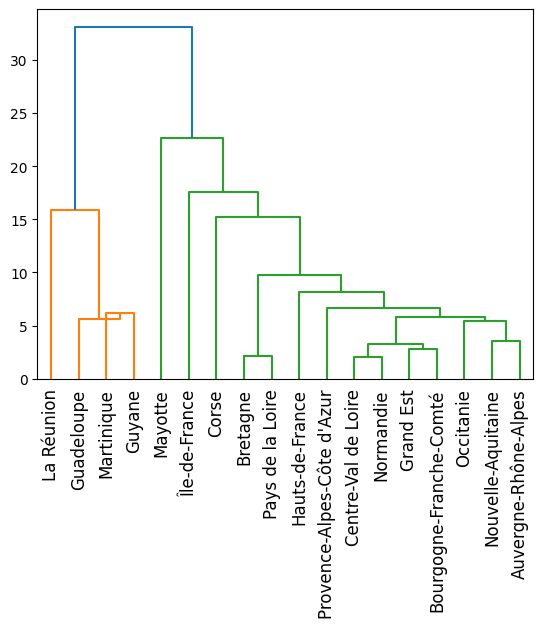

In [15]:
#Clustering hierarchique pour le plaisir
from scipy.cluster.hierarchy import dendrogram, linkage

votes = ['%Voix/Exp' + '_' + c for c in candidats]
labels = data['Libellé de la région'].to_numpy()
subdata1 = data[votes].to_numpy()
Z = linkage(y = subdata1, method='centroid', metric='euclidean');
dendrogram(Z, labels = labels, leaf_rotation = 90);

Le résultat semble cohérent étant donné que des régions d'outre mer comme la Martinique et la Guyanne ont voté en grande majorité Mélenchon, là où des régions comme le Grand Est et Bourgogne-Franche-Comté ont légèrement favorisé Lepen. Les Pays de la Loire et la Bretagne quant à eux ont voté Macron en majorité et se retouvent ainsi associé au début du dendrogramme.

Pour la suite, commençons par réaliser un clustering avec 3 clusters correspondant aux 3 candidats ayant obtenu le plus de suffrage : Macron, Lepen (+Zemmour?) et Mélenchon.

In [16]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = hierarchical_cluster.fit_predict(subdata1)

print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2]


Avec 3 clusters, le clustering hiérarchique ci-dessus a tendance à associer toutes les régions de France métropolitaine ensemble (cluster 0) puisque quel que soit le résultat, le % des voix exprimées en faveur de Macron, Lepen et Mélanchon sont plutôt équilibrés lorsqu'on les compare avec ceux des autres clusters.
En effet, les régions d'outre mer du cluster 1 ont voté en grande majorité Mélenchon, celle du cluster 2 Lepen.

Les régions d'outre mer de par leur résultats extrêmes (au sens des %) poussent les régions de France Métropolitaine à être dans le même cluster, alors que celles-ci présentent d'importantes différences dans les votes.  
C'est d'autant plus problématique que les régions d'outre mer ne représentent qu'une petite part des électeurs : par exemple, les résultats de la Guadeloupe, aussi majoritaires soient-ils, ne constituent que 300000 électeurs et ont évidemment moins d'impact sur l'élection que les 7 millions d'électeurs en île-de-France.  
Pour la suite, il sera donc important de pondérer l'importance des régions d'outre mer dans la construction du clustering.

In [ ]:
#Mixture models